In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
house_data = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/house_price.csv')

house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   house_id      6028 non-null   int64 
 1   neighborhood  6028 non-null   object
 2   area          6028 non-null   int64 
 3   bedrooms      6028 non-null   int64 
 4   bathrooms     6028 non-null   int64 
 5   style         6028 non-null   object
 6   price         6028 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 329.8+ KB


In [ ]:
DF = house_data.drop('house_id', axis=1)

DF.head()

,neighborhood,area,bedrooms,bathrooms,style,price
0,B,1188,3,2,ranch,598291
1,B,3512,5,3,victorian,1744259
2,B,1134,3,2,ranch,571669
3,A,1940,4,2,ranch,493675
4,B,2208,6,4,victorian,1101539


## Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
DF['neighborhood'] = encoder1.fit_transform(DF.neighborhood)

In [ ]:
DF['neighborhood']

0       1
1       1
2       1
3       0
4       1
       ..
6023    1
6024    2
6025    1
6026    2
6027    2
Name: neighborhood, Length: 6028, dtype: int64

In [ ]:
X = DF[['style']]

In [ ]:
encoder2 = LabelEncoder()
DF['style_LE'] = encoder2.fit_transform(X)

In [ ]:
DF = DF.drop('style', axis=1)

DF.head()

,neighborhood,area,bedrooms,bathrooms,price,style_LE
0,1,1188,3,2,598291,1
1,1,3512,5,3,1744259,2
2,1,1134,3,2,571669,1
3,0,1940,4,2,493675,1
4,1,2208,6,4,1101539,2


## 탐색적 데이터 분석

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

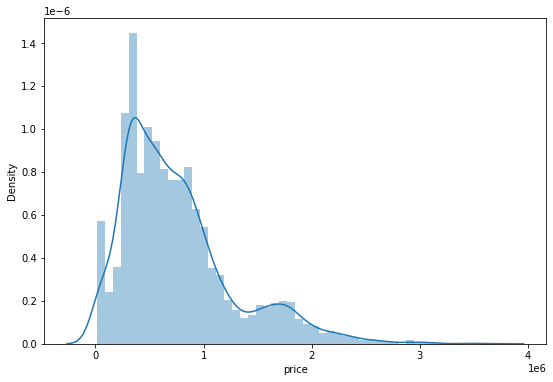

In [ ]:
plt.figure(figsize=(9,6))
sns.distplot(DF.price, hist=True, kde=True)
plt.show()

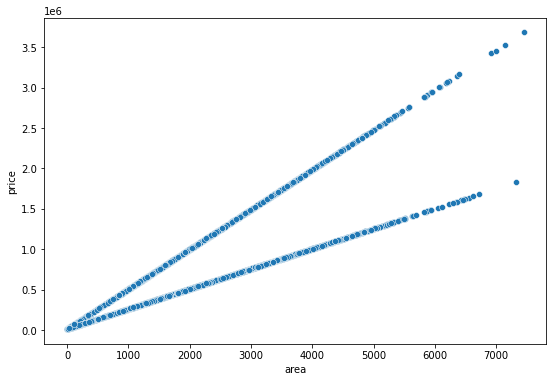

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=DF.area, y=DF.price)
plt.show()

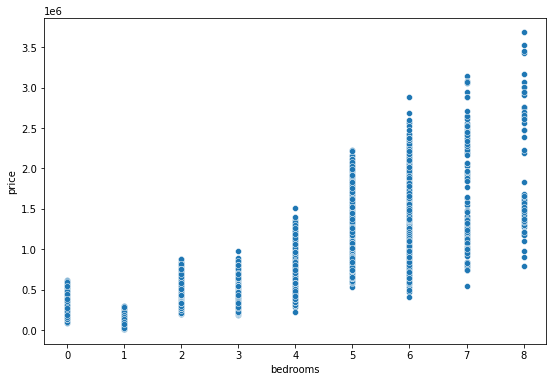

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=DF.bedrooms, y=DF.price)
plt.show()

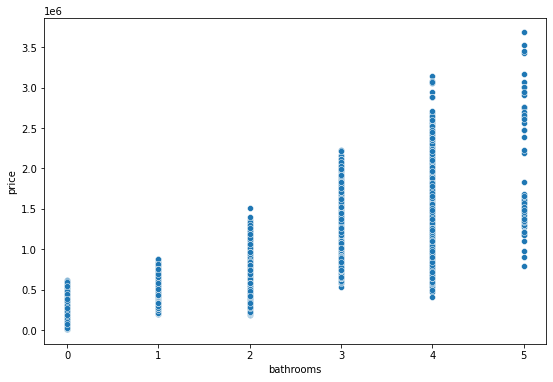

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=DF.bathrooms, y=DF.price)
plt.show()

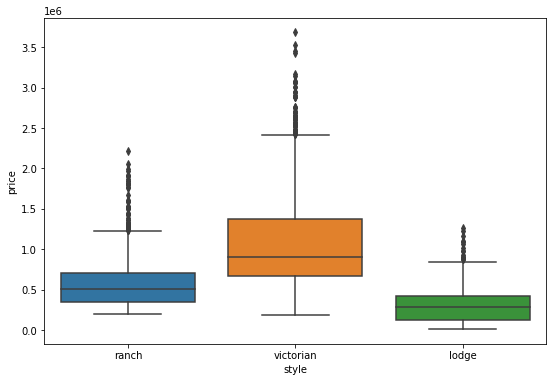

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x='style', y='price', data=house_data)
plt.show()

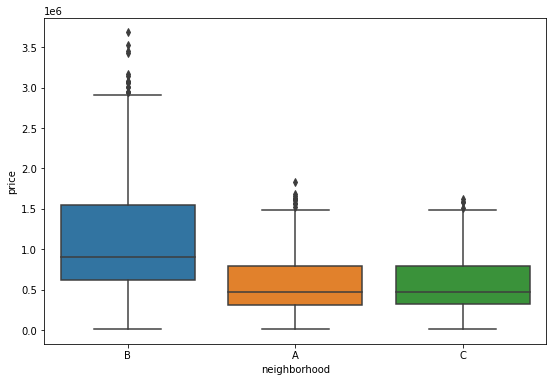

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x='neighborhood', y='price', data=house_data)
plt.show()

## 상관계수

In [ ]:
from scipy import stats

stats.pearsonr(DF.price, DF.style_LE)[0]

0.5763895318380587

In [ ]:
stats.pearsonr(DF.price, DF.neighborhood)[0]

0.01296008749454833

## Scaling

In [ ]:
X1 = DF[['area']]
y = DF['price']

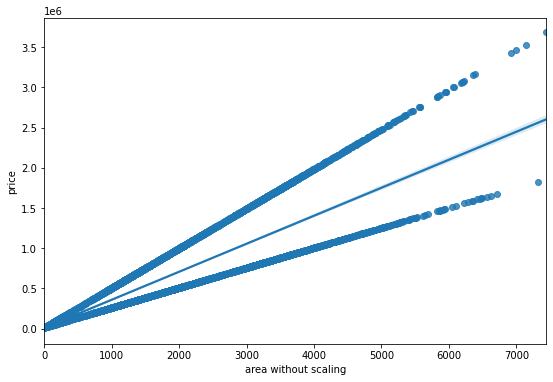

In [ ]:
fig = plt.figure(figsize=(9,6))
sns.regplot(x=X1, y=y)
plt.xlabel('area without scaling')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
X1_norm = scaler1.fit_transform(X1)

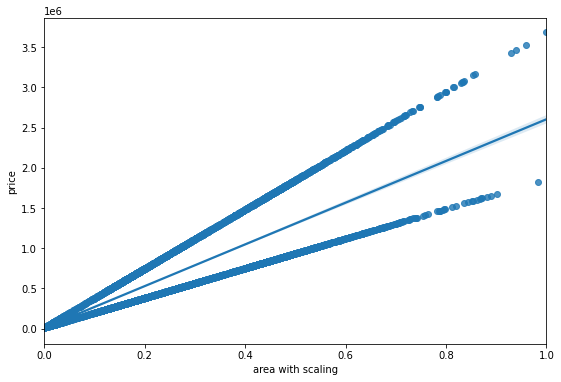

In [ ]:
fig = plt.figure(figsize=(9,6))
sns.regplot(x=X1_norm, y=y)
plt.xlabel('area with scaling')
plt.show()

In [ ]:
X2 = DF[['style_LE']]

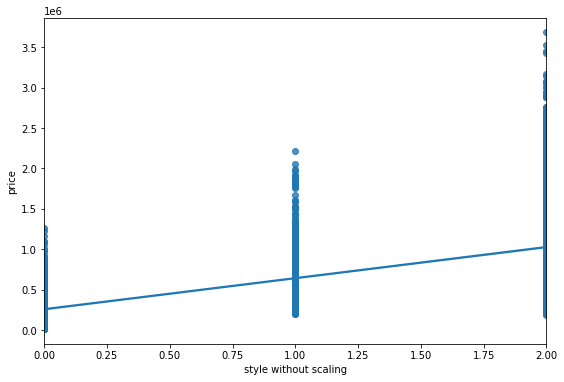

In [ ]:
fig = plt.figure(figsize=(9,6))
sns.regplot(x=X2, y=y)
plt.xlabel('style without scaling')
plt.show()

In [ ]:
scaler2 = MinMaxScaler()
X2_norm = scaler2.fit_transform(X2)

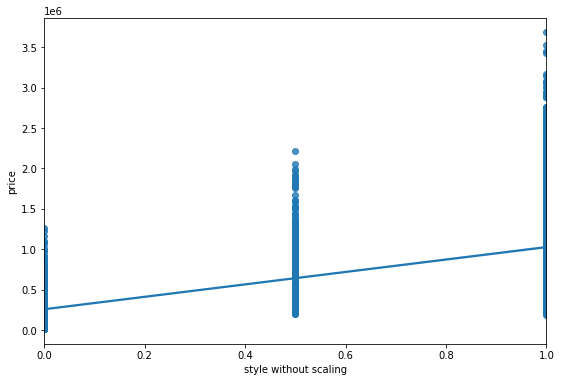

In [ ]:
fig = plt.figure(figsize=(9,6))
sns.regplot(x=X2_norm, y=y)
plt.xlabel('style without scaling')
plt.show()

In [ ]:
DF['area_norm'] = X1_norm
DF['style_norm'] = X2_norm

In [ ]:
DF.head()

,neighborhood,area,bedrooms,bathrooms,price,style_LE,area_norm,style_norm
0,1,1188,3,2,598291,1,0.159527,0.5
1,1,3512,5,3,1744259,2,0.471599,1.0
2,1,1134,3,2,571669,1,0.152276,0.5
3,0,1940,4,2,493675,1,0.260508,0.5
4,1,2208,6,4,1101539,2,0.296495,1.0


## Multivariate Regression

In [ ]:
DF1 = DF[['price', 'area_norm', 'style_norm']]
DF1.head()

,price,area_norm,style_norm
0,598291,0.159527,0.5
1,1744259,0.471599,1.0
2,571669,0.152276,0.5
3,493675,0.260508,0.5
4,1101539,0.296495,1.0


In [ ]:
from sklearn.model_selection import train_test_split

X = DF1[['area_norm', 'style_norm']]
y = DF1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2045)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4219, 2) (4219,)
(1809, 2) (1809,)


In [ ]:
from sklearn.linear_model import LinearRegression

Model1 = LinearRegression()
Model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(Model1.coef_)
print(Model1.intercept_)

[2619764.15192418  -11122.82749855]
9776.250981680234


In [ ]:
Model1.score(X_test, y_test)

0.6783666387129681

In [ ]:
from sklearn.metrics import mean_squared_error

y_hat1 = Model1.predict(X_test)

MSE1 = mean_squared_error(y_test, y_hat1)
print(MSE1)

88623358074.21796


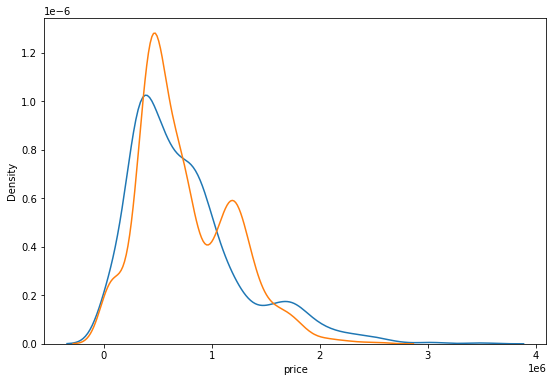

In [ ]:
plt.figure(figsize=(9, 6))
ax1 = sns.distplot(y_test, hist=False, label='y_test')
ax2 = sns.distplot(y_hat1, hist=False, label='y_hat1', ax=ax1)
plt.show()

## 선형회귀

In [ ]:
from sklearn.model_selection import train_test_split

X = DF[['area']]
y = DF['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2045)

In [ ]:
from sklearn.linear_model import LinearRegression

model3 = LinearRegression()
model3.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model3.score(X_test, y_test)

0.6784229855524156

In [ ]:
from sklearn.metrics import mean_squared_error

y_hat3 = model3.predict(X_test)

MSE3 = mean_squared_error(y_test, y_hat3)
print(MSE3)

88607832178.18301


## 선형회귀 다차

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

model4 = LinearRegression()
model4.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_test_poly = poly.fit_transform(X_test)

model4.score(X_test_poly, y_test)

0.6775886889534423

In [ ]:
from sklearn.metrics import mean_squared_error

y_hat4 = model4.predict(X_test_poly)

MSE4 = mean_squared_error(y_test, y_hat4)
print(MSE4)

88837715564.45564


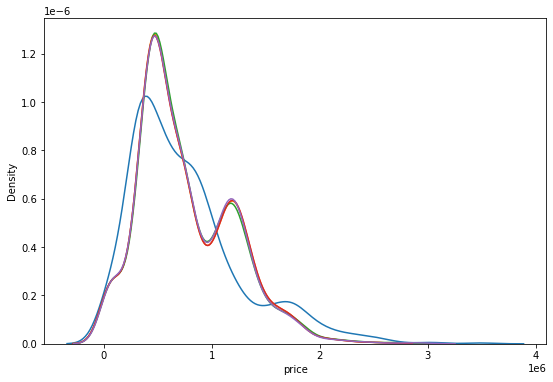

In [ ]:
plt.figure(figsize=(9, 6))
ax1 = sns.distplot(y_test, hist=False, label='y_test')
ax2 = sns.distplot(y_hat1, hist=False, label='y_hat', ax=ax1)
ax3 = sns.distplot(y_hat2, hist=False, label='y_hat', ax=ax1)
ax4 = sns.distplot(y_hat3, hist=False, label='y_hat', ax=ax1)
ax5 = sns.distplot(y_hat4, hist=False, label='y_hat', ax=ax1)